In [1]:
#importing the basic packages 

import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from soccerplots.radar_chart import Radar
from sklearn.cluster import KMeans

In [2]:
#reading in the dataframe

df = pd.read_csv('2021-2022.csv')

In [3]:
#checking for null values
#only null values seem to be under team, which does not matter to this analysis

df.isnull().sum()

Player                                  0
Team                                   53
Position                                0
Age                                     0
Market value                            0
Minutes played                          0
xG                                      0
xA                                      0
Duels per 90                            0
Duels won, %                            0
Height                                  0
Weight                                  0
Successful defensive actions per 90     0
Defensive duels per 90                  0
Defensive duels won, %                  0
Aerial duels per 90                     0
Aerial duels won, %                     0
PAdj Sliding tackles                    0
Shots blocked per 90                    0
PAdj Interceptions                      0
Fouls per 90                            0
Yellow cards per 90                     0
Successful attacking actions per 90     0
Shots per 90                      

In [6]:
df.columns

Index(['Player', 'Team', 'Position', 'Age', 'Market value', 'Minutes played',
       'xG', 'xA', 'Duels per 90', 'Duels won, %', 'Height', 'Weight',
       'Successful defensive actions per 90', 'Defensive duels per 90',
       'Defensive duels won, %', 'Aerial duels per 90', 'Aerial duels won, %',
       'PAdj Sliding tackles', 'Shots blocked per 90', 'PAdj Interceptions',
       'Fouls per 90', 'Yellow cards per 90',
       'Successful attacking actions per 90', 'Shots per 90',
       'Shots on target, %', 'Crosses per 90', 'Accurate crosses, %',
       'Dribbles per 90', 'Successful dribbles, %', 'Offensive duels per 90',
       'Touches in box per 90', 'Progressive runs per 90',
       'Received passes per 90', 'Passes per 90', 'Accurate passes, %',
       'Forward passes per 90', 'Back passes per 90', 'Lateral passes per 90',
       'Long passes per 90', 'Average pass length, m', 'Smart passes per 90',
       'Key passes per 90', 'Passes to final third per 90',
       'Passes to p

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Player                               2789 non-null   object 
 1   Team                                 2736 non-null   object 
 2   Position                             2789 non-null   object 
 3   Age                                  2789 non-null   int64  
 4   Market value                         2789 non-null   int64  
 5   Minutes played                       2789 non-null   int64  
 6   xG                                   2789 non-null   float64
 7   xA                                   2789 non-null   float64
 8   Duels per 90                         2789 non-null   float64
 9   Duels won, %                         2789 non-null   float64
 10  Height                               2789 non-null   int64  
 11  Weight                        

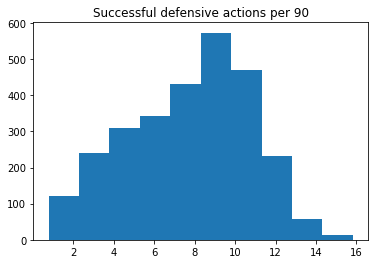

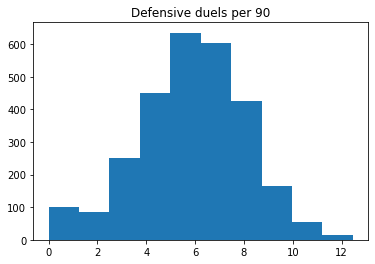

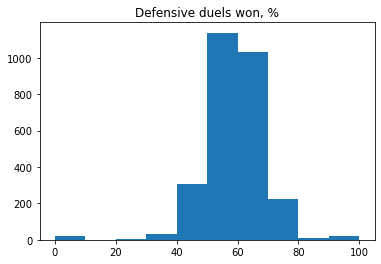

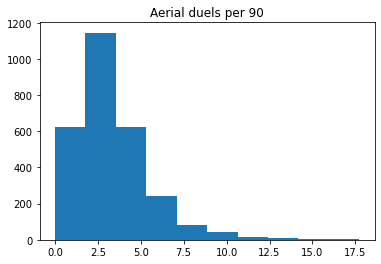

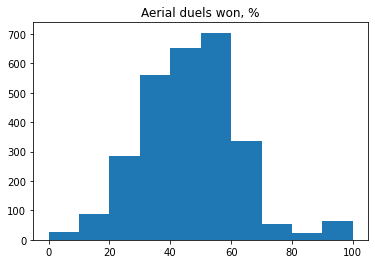

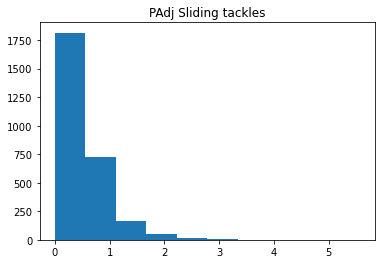

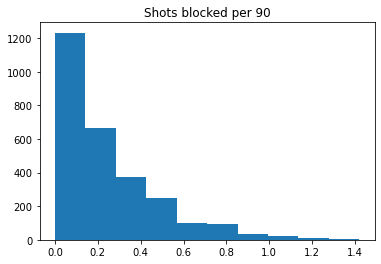

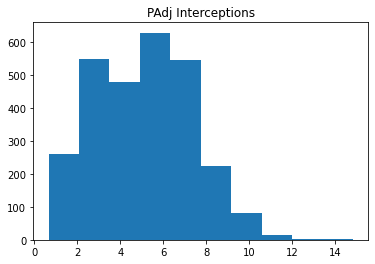

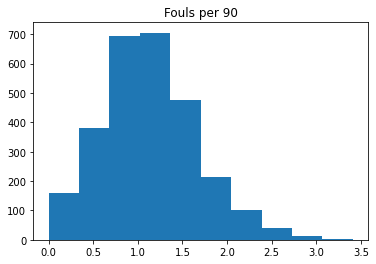

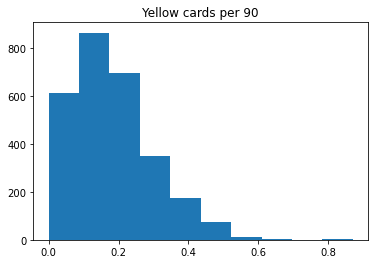

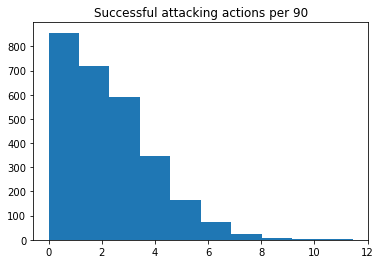

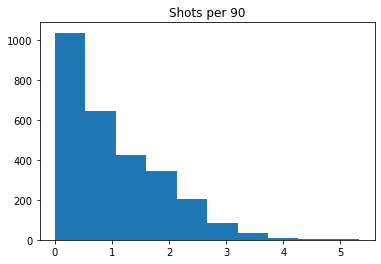

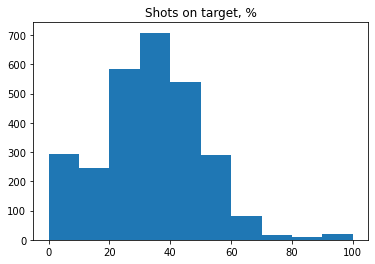

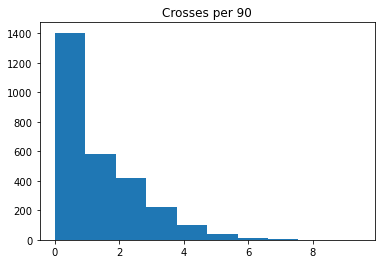

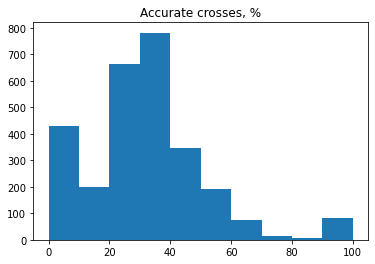

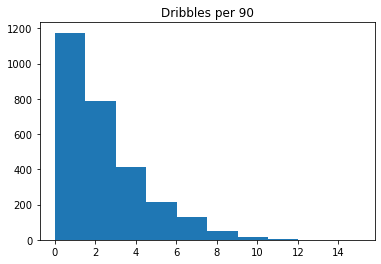

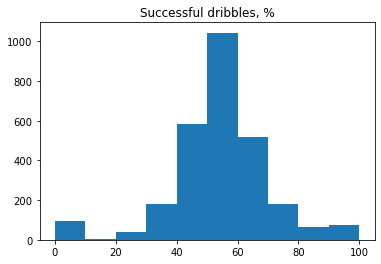

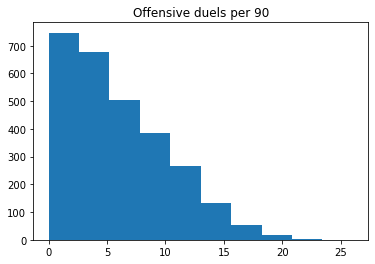

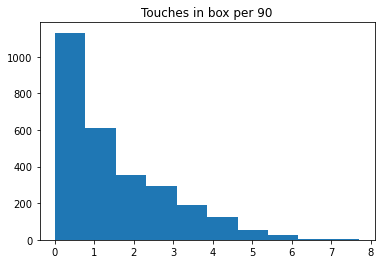

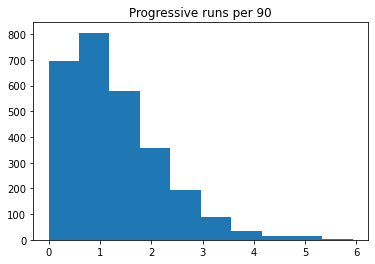

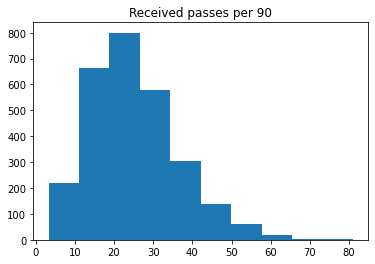

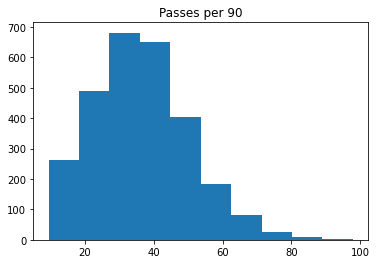

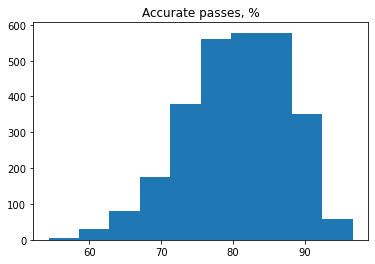

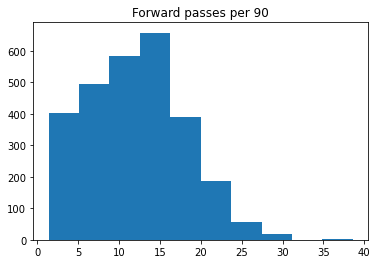

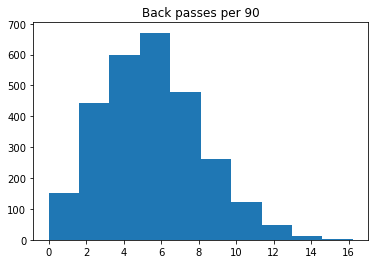

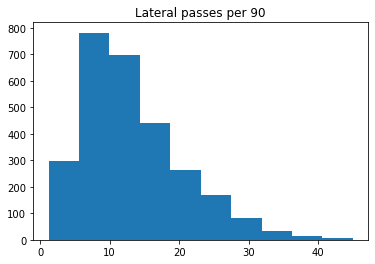

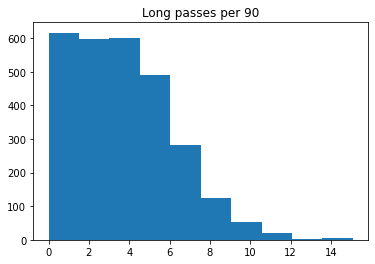

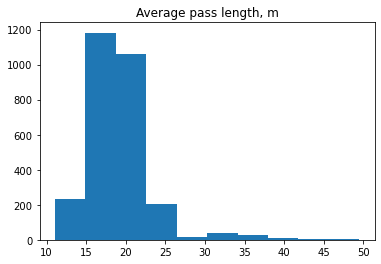

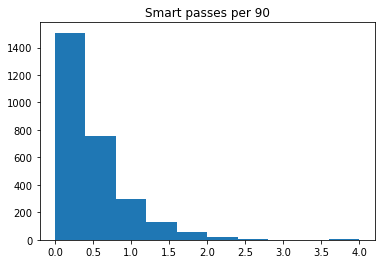

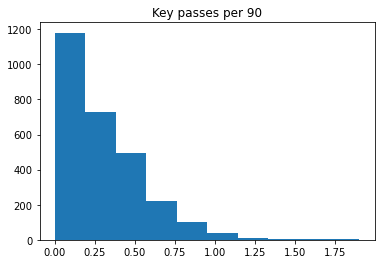

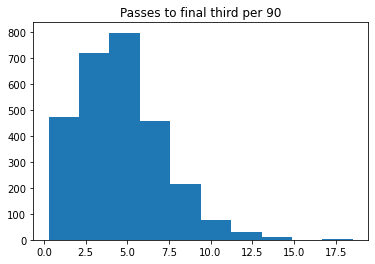

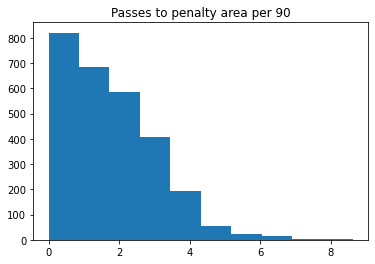

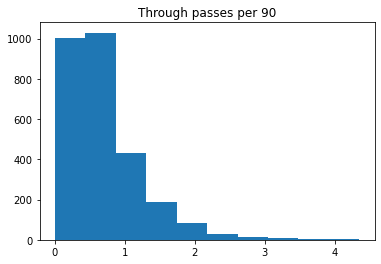

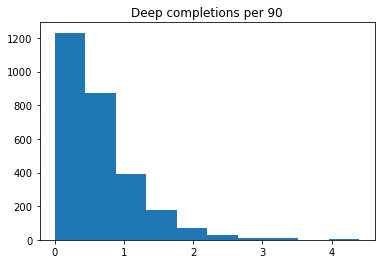

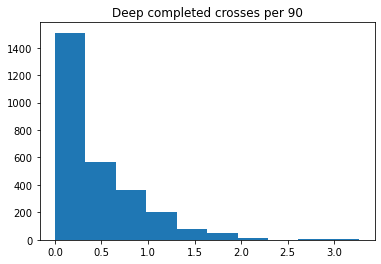

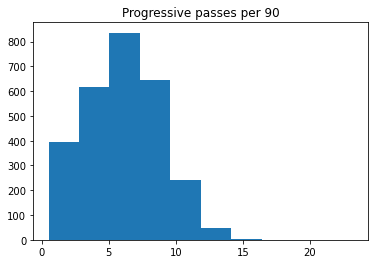

In [8]:
#running histogram for all the numeric columns
#although there are some normal distributions, most are skewed towards the left

for i in df.columns[12:]:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

/Users/arshdeepsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


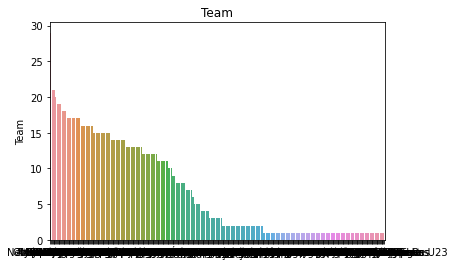

/Users/arshdeepsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


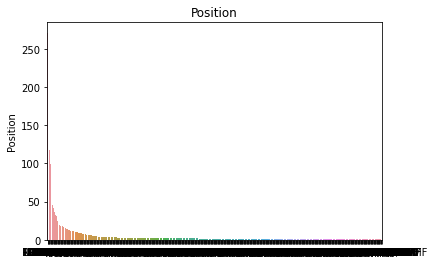

/Users/arshdeepsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


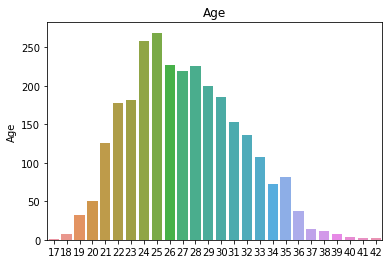

/Users/arshdeepsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


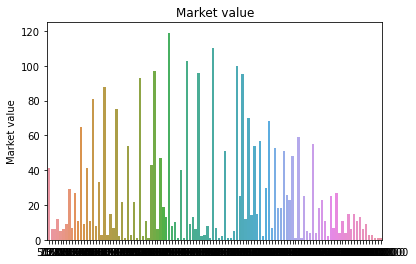

/Users/arshdeepsingh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


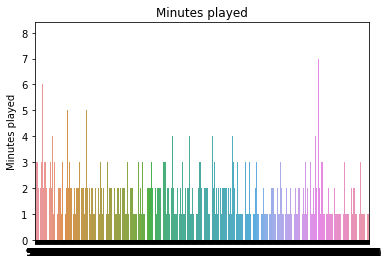

In [10]:
for i in df.columns[1:6]:
    sns.barplot(df[i].value_counts().index,df[i].value_counts()).set_title(i)
    plt.show()

In [23]:
pd.pivot_table(df, index = 'Position', values = 'Accurate passes, %')

,"Accurate passes, %"
Position,
AMF,78.695353
CB,86.301208
CF,74.259664
CM,83.046083
DMF,85.521268
FB,77.684465
W,76.269703


In [5]:
#checking the basic statistics of all the numerical columns
#the dataset is broad, containing all positions including GK's so we cannot deduce much information

pd.set_option('display.max_columns',None)
df.describe()

,Age,Market value,Minutes played,xG,xA,Duels per 90,"Duels won, %",Height,Weight,Successful defensive actions per 90,Defensive duels per 90,"Defensive duels won, %",Aerial duels per 90,"Aerial duels won, %",PAdj Sliding tackles,Shots blocked per 90,PAdj Interceptions,Fouls per 90,Yellow cards per 90,Successful attacking actions per 90,Shots per 90,"Shots on target, %",Crosses per 90,"Accurate crosses, %",Dribbles per 90,"Successful dribbles, %",Offensive duels per 90,Touches in box per 90,Progressive runs per 90,Received passes per 90,Passes per 90,"Accurate passes, %",Forward passes per 90,Back passes per 90,Lateral passes per 90,Long passes per 90,"Average pass length, m",Smart passes per 90,Key passes per 90,Passes to final third per 90,Passes to penalty area per 90,Through passes per 90,Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90
count,2789.000000,2.789000e+03,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000
mean,27.173180,8.244649e+06,1954.224453,2.761352,1.635411,18.457967,50.494389,181.499462,75.451058,7.739347,5.866042,58.823191,3.320043,46.427838,0.509624,0.241090,5.084041,1.130771,0.181441,2.261936,1.033571,32.572686,1.337885,30.984227,2.365923,53.748591,5.964141,1.531180,1.284647,25.172291,36.409053,80.543962,12.079978,5.485489,13.339803,3.756691,19.194980,0.478670,0.291259,4.619082,1.783302,0.698318,0.638035,0.427659,6.085877
std,4.245318,1.416004e+07,678.529791,3.402277,1.810836,6.160162,10.647618,7.347523,7.066008,3.011778,2.223943,10.349229,2.164475,16.225769,0.474467,0.236758,2.221079,0.535941,0.118828,1.686517,0.828891,17.219689,1.307798,20.285239,2.047071,16.727585,4.339188,1.344511,0.934166,11.167409,13.821197,7.136442,5.780151,2.687420,7.242067,2.452326,4.086093,0.475458,0.263632,2.521607,1.280582,0.539834,0.548494,0.453749,2.797680
min,17.000000,0.000000e+00,900.000000,0.000000,0.000000,0.190000,21.520000,0.000000,0.000000,0.770000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.300000,9.400000,54.300000,1.380000,0.000000,1.210000,0.000000,11.050000,0.000000,0.000000,0.280000,0.000000,0.000000,0.000000,0.000000,0.510000
25%,24.000000,7.500000e+05,1371.000000,0.660000,0.340000,14.930000,43.140000,177.000000,70.000000,5.440000,4.540000,53.490000,1.850000,35.710000,0.180000,0.070000,3.200000,0.780000,0.090000,0.870000,0.380000,22.220000,0.260000,20.830000,0.770000,46.670000,2.420000,0.530000,0.600000,16.920000,26.400000,75.730000,7.560000,3.540000,7.960000,1.710000,16.810000,0.140000,0.080000,2.680000,0.750000,0.330000,0.240000,0.080000,4.080000
50%,27.000000,2.500000e+06,1888.000000,1.560000,1.080000,18.120000,50.550000,182.000000,75.000000,8.160000,5.990000,59.260000,2.860000,46.670000,0.390000,0.170000,5.180000,1.080000,0.170000,2.000000,0.770000,33.330000,0.930000,31.110000,1.860000,53.850000,5.070000,1.030000,1.100000,23.620000,35.400000,80.930000,12.040000,5.360000,11.810000,3.510000,18.680000,0.360000,0.240000,4.390000,1.560000,0.570000,0.520000,0.270000,6.060000
75%,30.000000,9.000000e+06,2501.000000,3.570000,2.280000,22.020000,57.010000,186.000000,80.000000,10.010000,7.400000,64.660000,4.300000,56.180000,0.710000,0.340000,6.720000,1.450000,0.250000,3.280000,1.570000,43.210000,2.110000,40.000000,3.400000,61.820000,8.740000,2.310000,1.800000,31.240000,45.080000,86.230000,15.990000,7.140000,17.400000,5.350000,20.680000,0.670000,0.440000,6.050000,2.590000,0.900000,0.870000,0.670000,8.0300

In [7]:
#here we drop rows where Position equals GK
#most stats see a significant change, especially in the possession and attacking categories

df = df[df.Position != 'GK']
df.describe()

,Age,Market value,Minutes played,xG,xA,Duels per 90,"Duels won, %",Height,Weight,Successful defensive actions per 90,Defensive duels per 90,"Defensive duels won, %",Aerial duels per 90,"Aerial duels won, %",PAdj Sliding tackles,Shots blocked per 90,PAdj Interceptions,Fouls per 90,Yellow cards per 90,Successful attacking actions per 90,Shots per 90,"Shots on target, %",Crosses per 90,"Accurate crosses, %",Dribbles per 90,"Successful dribbles, %",Offensive duels per 90,Touches in box per 90,Progressive runs per 90,Received passes per 90,Passes per 90,"Accurate passes, %",Forward passes per 90,Back passes per 90,Lateral passes per 90,Long passes per 90,"Average pass length, m",Smart passes per 90,Key passes per 90,Passes to final third per 90,Passes to penalty area per 90,Through passes per 90,Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90
count,2690.000000,2.690000e+03,2690.000000,2690.00000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.00000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000,2690.000000
mean,27.112639,8.493866e+06,1945.017100,2.86161,1.694435,19.109926,49.463409,181.234944,75.160223,7.957955,6.077182,59.108037,3.427558,44.839097,0.527301,0.249952,5.184513,1.171483,0.185665,2.344439,1.071517,33.734283,1.387078,32.013015,2.452100,54.692000,6.179874,1.587439,1.331885,25.646442,37.041257,80.428204,12.106513,5.687074,13.564156,3.591825,18.61581,0.496286,0.301777,4.711338,1.844654,0.720387,0.661030,0.443368,6.080357
std,4.200837,1.434450e+07,673.594053,3.42271,1.816937,5.231041,9.102230,7.289210,6.930670,2.837084,1.967565,7.945284,2.128552,13.913783,0.473858,0.236441,2.194147,0.501051,0.118249,1.660478,0.819616,16.301128,1.305796,19.646730,2.033578,14.032995,4.267310,1.336062,0.917555,11.051211,13.630123,7.185917,5.850514,2.518508,7.256568,2.291186,2.68002,0.475013,0.262553,2.511571,1.262480,0.536691,0.544974,0.454436,2.824786
min,17.000000,0.000000e+00,900.000000,0.00000,0.000000,7.640000,21.520000,0.000000,0.000000,0.990000,1.040000,25.000000,0.000000,0.000000,0.000000,0.000000,0.660000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,5.670000,9.400000,54.300000,1.380000,0.680000,1.600000,0.000000,11.05000,0.000000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.510000
25%,24.000000,8.000000e+05,1368.000000,0.74000,0.400000,15.240000,42.805000,177.000000,70.000000,5.750000,4.690000,53.850000,1.960000,35.305000,0.200000,0.080000,3.370000,0.810000,0.100000,1.020000,0.410000,25.000000,0.310000,22.220000,0.862500,47.220000,2.660000,0.570000,0.650000,17.470000,27.382500,75.590000,7.480000,3.770000,8.150000,1.650000,16.74000,0.160000,0.090000,2.822500,0.810000,0.360000,0.270000,0.090000,4.020000
50%,27.000000,2.500000e+06,1879.500000,1.65000,1.140000,18.300000,50.000000,181.000000,75.000000,8.300000,6.080000,59.300000,2.930000,46.025000,0.400000,0.180000,5.300000,1.110000,0.170000,2.070000,0.810000,33.330000,1.000000,31.820000,1.930000,54.170000,5.290000,1.075000,1.140000,24.050000,36.070000,80.785000,12.120000,5.465000,12.015000,3.375000,18.55000,0.370000,0.250000,4.455000,1.625000,0.590000,0.540000,0.290000,6.065000
75%,30.000000,1.000000e+07,2486.750000,3.67000,2.340000,22.187500,56.155000,186.000000,80.000000,10.077500,7.450000,64.575000,4.350000,55.217500,0.720000,0.350000,6.760000,1.470000,0.260000,3.330000,1.607500,43.750000,2.160000,40.000000,3.480000,61.782500,8.867500,2.380000,1.830000,31.607500,45.442500,86.172500,16.067500,7.260000,17.657500,5.140000,20.39750,0.680000,0.450000,6.137500,2.640000,0.920000,0.890000,0.680000,8.050000
max,42.00000

In [3]:
#some players have multiple positions, so we will split on the comma and take the first position as this is their main position 
#i.e. position they play most of their minutes in

df['Position'] = df.Position.apply(lambda x: x.split(',')[0])
df['Position'].unique()

array(['RDMF', 'RCMF', 'DMF', 'LDMF', 'LCMF', 'RWB', 'RAMF', 'RW', 'RB',
       'CF', 'LWF', 'RWF', 'AMF', 'LAMF', 'LW', 'LWB', 'LB', 'LCB', 'RCB',
       'CB', 'GK'], dtype=object)

In [4]:
#furthermore, we don't prefer one side of the field over another so we will collect players by broad positions on the field
#i.e. centerback, attacking mid, winger etc. 

df = df.replace({'Position' : {'LCMF':'CM','RCMF':'CM'}})
df = df.replace({'Position' : {'RCB':'CB','LCB':'CB'}})
df = df.replace({'Position' : {'RAMF':'AMF','LAMF':'AMF'}})
df = df.replace({'Position' : {'RDMF':'DMF','LDMF':'DMF'}})
df = df.replace({'Position' : {'LW':'W','RW':'W','LWF':'W','RWF':'W'}})
df = df.replace({'Position' : {'RB':'FB','LB':'FB','LWB':
                              'FB','RWB':'FB'}})

In [5]:
#in the next few cells, we will be creating columns that represent the broad positions 

def condition(s):
    if (s['Position']=='CM') or (s['Position']=='DMF'):
        return 1
    else:
        return 0
    
df['Midfield'] = df.apply(condition,axis=1)

In [6]:
def condition(s):
    if (s['Position']=='AMF') or (s['Position']=='W'):
        return 1
    else:
        return 0
    
df['Attacking'] = df.apply(condition,axis=1)

In [7]:
def condition(s):
    if (s['Position']=='CF'):
        return 1
    else:
        return 0

df['Forward'] = df.apply(condition,axis=1)

In [8]:
def condition(s):
    if (s['Position']=='CB'):
        return 1
    else:
        return 0

df['Centerback'] = df.apply(condition,axis=1)

In [9]:
def condition(s):
    if (s['Position']=='FB'):
        return 1
    else:
        return 0

df['Fullback'] = df.apply(condition,axis=1)

In [10]:
#here we create different dataframes so we can focus on one position on the field at a time
#if we want to look at just Forwards, we can utilize the dffw
#this is helpful because different positions on the field will have different statistics for the various attributes
#Frenkie de Jong is a midfielder, so we will be focusing on the 'dfmf' for this analysis

dfmf = df.loc[df['Midfield'] == 1]
dfatt = df.loc[df['Attacking'] == 1]
dfcb = df.loc[df['Centerback'] == 1]
dffb = df.loc[df['Fullback'] == 1]
dffw = df.loc[df['Forward'] == 1]

In [25]:
dfmf.describe()

,Age,Market value,Minutes played,xG,xA,Duels per 90,"Duels won, %",Height,Weight,Successful defensive actions per 90,Defensive duels per 90,"Defensive duels won, %",Aerial duels per 90,"Aerial duels won, %",PAdj Sliding tackles,Shots blocked per 90,PAdj Interceptions,Fouls per 90,Yellow cards per 90,Successful attacking actions per 90,Shots per 90,"Shots on target, %",Crosses per 90,"Accurate crosses, %",Dribbles per 90,"Successful dribbles, %",Offensive duels per 90,Touches in box per 90,Progressive runs per 90,Received passes per 90,Passes per 90,"Accurate passes, %",Forward passes per 90,Back passes per 90,Lateral passes per 90,Long passes per 90,"Average pass length, m",Smart passes per 90,Key passes per 90,Passes to final third per 90,Passes to penalty area per 90,Through passes per 90,Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90,Midfield,Attacking,Forward,Centerback,Fullback
count,616.000000,6.160000e+02,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.0,616.0,616.0,616.0,616.0
mean,27.133117,9.394562e+06,2009.069805,1.890292,1.525958,18.780909,50.357565,180.287338,73.823052,9.040146,7.202500,58.303750,2.671769,46.297354,0.760341,0.225455,5.628166,1.405974,0.232045,1.831006,0.920373,29.128620,0.777175,33.376607,1.927857,55.232403,5.459123,0.915860,1.064107,29.562792,43.118279,83.869805,13.216867,6.622987,16.456834,3.859286,18.273718,0.574903,0.225162,6.509578,1.637873,0.900341,0.654854,0.261412,6.318880,1.0,0.0,0.0,0.0,0.0
std,4.182248,1.484611e+07,656.280487,1.880957,1.610614,3.777846,4.515388,5.700398,5.843447,2.119425,1.679721,5.479028,1.428295,11.467074,0.626540,0.141377,1.715983,0.514719,0.125490,1.025635,0.533937,14.269143,0.634348,18.579420,1.211545,11.314848,2.649763,0.692338,0.732605,11.289961,12.430083,5.483104,3.911599,2.126604,6.322527,1.716345,1.626358,0.429249,0.181687,2.502052,0.953965,0.583433,0.458163,0.240104,1.988474,0.0,0.0,0.0,0.0,0.0
min,18.000000,0.000000e+00,901.000000,0.000000,0.000000,7.640000,37.060000,165.000000,58.000000,3.050000,2.370000,42.670000,0.350000,0.000000,0.000000,0.000000,1.910000,0.080000,0.000000,0.140000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,1.110000,0.000000,0.000000,6.440000,12.790000,63.450000,4.360000,2.060000,2.560000,0.280000,14.520000,0.000000,0.000000,1.420000,0.130000,0.050000,0.000000,0.000000,1.420000,1.0,0.0,0.0,0.0,0.0
25%,24.000000,8.375000e+05,1428.000000,0.657500,0.467500,16.200000,47.202500,176.000000,70.000000,7.530000,6.027500,54.767500,1.690000,38.942500,0.320000,0.120000,4.345000,1.060000,0.150000,1.090000,0.520000,20.000000,0.290000,24.000000,1.010000,48.280000,3.577500,0.450000,0.550000,21.435000,33.720000,80.282500,10.360000,5.167500,11.750000,2.540000,17.130000,0.280000,0.090000,4.700000,0.927500,0.497500,0.330000,0.090000,4.870000,1.0,0.0,0.0,0.0,0.0
50%,27.000000,3.000000e+06,1978.000000,1.320000,1.020000,18.405000,50.575000,180.000000,74.000000,8.995000,7.130000,58.735000,2.345000,47.370000,0.625000,0.205000,5.485000,1.380000,0.220000,1.625000,0.825000,29.130000,0.605000,33.330000,1.655000,54.550000,4.975000,0.750000,0.880000,27.870000,41.520000,84.745000,12.720000,6.390000,15.490000,3.580000,18.210000,0.470000,0.190000,5.995000,1.420000,0.750000,0.570000,0.195000,6.080000,1.0,0.0,0.0,0.0,0.0
75%,30.000000,1.200000e+07,2524.500000,2.437500,2.092500,21.387500,53.330000,184.000000,77.000000,10.430000,8.290000,62.285000,3.370000,53.850000,1.010000,0.310000,6.745000,1.722500,0.300000,2.370000,1.182500,37.500000,1.070000,42.860000,2.550000,61.715000,6.830000,1.210000,1.372500,35.640000

Some basic graphs on the Midfielder dataframe

<AxesSubplot:>

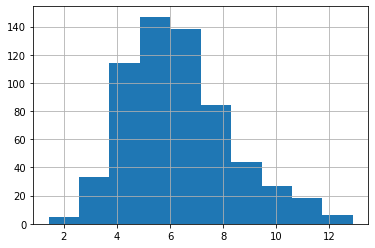

In [17]:
#follows a normal distribution, progressive passes are important for a midfielder like de Jong
dfmf['Progressive passes per 90'].hist()

<AxesSubplot:>

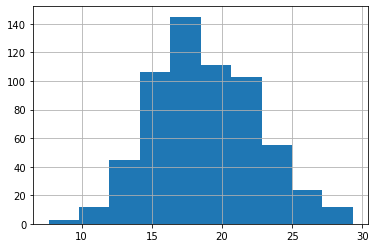

In [18]:
dfmf['Duels per 90'].hist()

<AxesSubplot:>

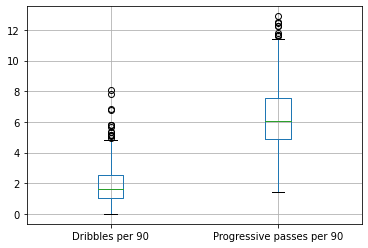

In [19]:
#two important ways that a de Jong type midfielder can help to move the ball up the field
#most midfielders have a few dribbles, but there are some that approach 6 or 8 dribbles per 90 minutes 
#the progressive passes boxplot shows what we saw in the histogram - a mostly normal dist with a longer right tail

dfmf.boxplot(column = ['Dribbles per 90','Progressive passes per 90'])

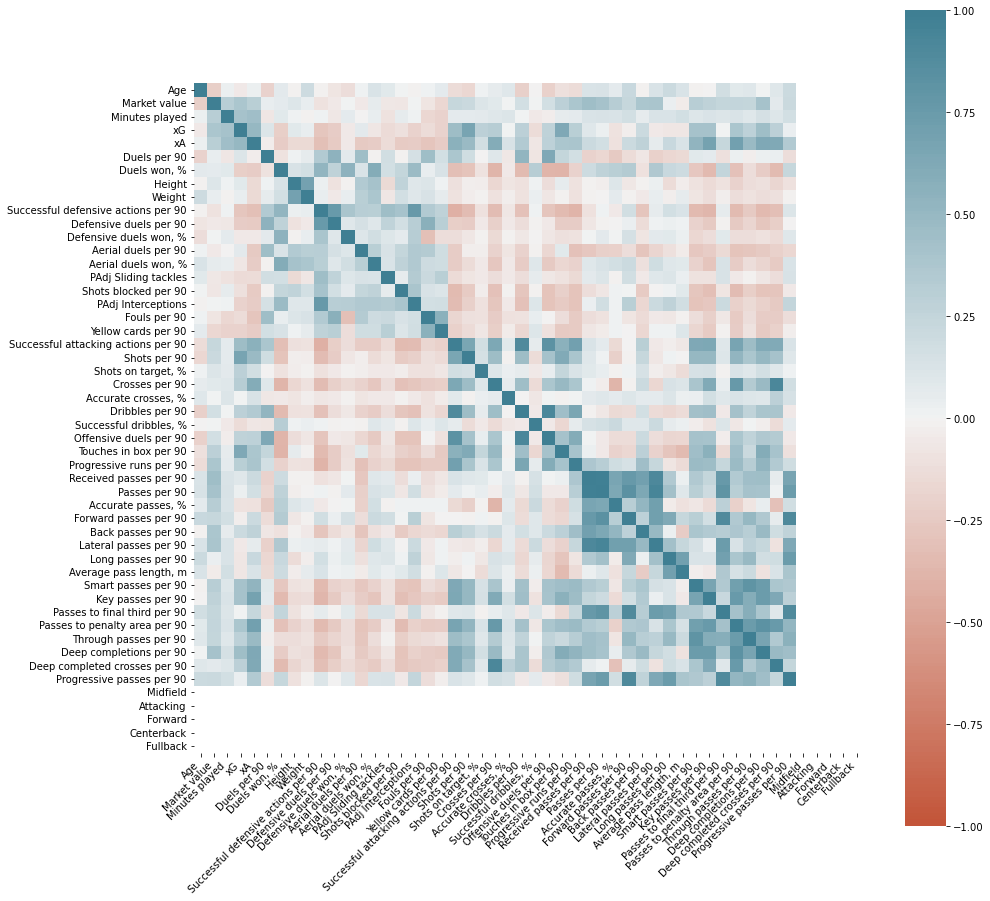

In [20]:
rcParams['figure.figsize'] = 15,15
corr = dfmf.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [21]:
pd.set_option('display.max_rows',None)
correlation_mat=df.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

Age                                  Age                                    1.000000
                                     Market value                          -0.190635
                                     Minutes played                         0.098628
                                     xG                                     0.032779
                                     xA                                     0.028972
                                     Duels per 90                          -0.216499
                                     Duels won, %                           0.076339
                                     Height                                 0.033263
                                     Weight                                 0.171243
                                     Successful defensive actions per 90   -0.044945
                                     Defensive duels per 90                -0.148023
                                     Defensive duels won, %      

In [22]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

Touches in box per 90                Successful defensive actions per 90   -0.717607
Successful defensive actions per 90  Touches in box per 90                 -0.717607
Duels won, %                         Offensive duels per 90                -0.707920
Offensive duels per 90               Duels won, %                          -0.707920
Shots per 90                         Successful defensive actions per 90   -0.695938
Successful defensive actions per 90  Shots per 90                          -0.695938
Touches in box per 90                Duels won, %                          -0.695453
Duels won, %                         Touches in box per 90                 -0.695453
Shots per 90                         Duels won, %                          -0.688222
Duels won, %                         Shots per 90                          -0.688222
Touches in box per 90                Forward passes per 90                 -0.647534
Forward passes per 90                Touches in box per 90       

In [24]:
dfmf.loc[dfmf['Player'] == 'F. de Jong']

,Player,Team,Position,Age,Market value,Minutes played,xG,xA,Duels per 90,"Duels won, %",Height,Weight,Successful defensive actions per 90,Defensive duels per 90,"Defensive duels won, %",Aerial duels per 90,"Aerial duels won, %",PAdj Sliding tackles,Shots blocked per 90,PAdj Interceptions,Fouls per 90,Yellow cards per 90,Successful attacking actions per 90,Shots per 90,"Shots on target, %",Crosses per 90,"Accurate crosses, %",Dribbles per 90,"Successful dribbles, %",Offensive duels per 90,Touches in box per 90,Progressive runs per 90,Received passes per 90,Passes per 90,"Accurate passes, %",Forward passes per 90,Back passes per 90,Lateral passes per 90,Long passes per 90,"Average pass length, m",Smart passes per 90,Key passes per 90,Passes to final third per 90,Passes to penalty area per 90,Through passes per 90,Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90,Midfield,Attacking,Forward,Centerback,Fullback
18,F. de Jong,Barcelona,CM,25,60000000,3353,3.86,3.88,15.27,53.25,180,74,5.8,4.29,56.25,2.09,57.69,0.76,0.05,4.54,0.67,0.13,1.99,0.43,37.5,0.59,40.91,1.83,63.24,6.28,2.12,3.03,57.2,73.33,92.61,21.45,8.19,29.2,1.99,16.16,1.18,0.51,9.48,1.74,1.42,1.37,0.21,8.08,1,0,0,0,0


In [26]:
dfmf.columns

Index(['Player', 'Team', 'Position', 'Age', 'Market value', 'Minutes played',
       'xG', 'xA', 'Duels per 90', 'Duels won, %', 'Height', 'Weight',
       'Successful defensive actions per 90', 'Defensive duels per 90',
       'Defensive duels won, %', 'Aerial duels per 90', 'Aerial duels won, %',
       'PAdj Sliding tackles', 'Shots blocked per 90', 'PAdj Interceptions',
       'Fouls per 90', 'Yellow cards per 90',
       'Successful attacking actions per 90', 'Shots per 90',
       'Shots on target, %', 'Crosses per 90', 'Accurate crosses, %',
       'Dribbles per 90', 'Successful dribbles, %', 'Offensive duels per 90',
       'Touches in box per 90', 'Progressive runs per 90',
       'Received passes per 90', 'Passes per 90', 'Accurate passes, %',
       'Forward passes per 90', 'Back passes per 90', 'Lateral passes per 90',
       'Long passes per 90', 'Average pass length, m', 'Smart passes per 90',
       'Key passes per 90', 'Passes to final third per 90',
       'Passes to p

In [11]:
new = df.drop(['Team', 'Position', 'Age', 'Market value', 'Minutes played',
       'xG', 'Duels per 90','Height', 'Weight',
       'Defensive duels per 90',
       'Defensive duels won, %', 'Aerial duels per 90', 'Aerial duels won, %',
       'PAdj Sliding tackles', 'Shots blocked per 90', 'PAdj Interceptions',
       'Fouls per 90', 'Yellow cards per 90',
       'Shots per 90',
       'Shots on target, %', 'Crosses per 90', 'Accurate crosses, %',
       'Successful dribbles, %', 'Offensive duels per 90',
       'Touches in box per 90', 'Progressive runs per 90',
       'Received passes per 90', 'Passes per 90',
       'Forward passes per 90', 'Back passes per 90', 'Lateral passes per 90',
       'Long passes per 90', 'Average pass length, m', 'Smart passes per 90',
       'Key passes per 90', 'Passes to final third per 90',
       'Passes to penalty area per 90', 'Through passes per 90',
       'Deep completions per 90', 'Deep completed crosses per 90',
       'Midfield', 'Attacking', 'Forward',
       'Centerback', 'Fullback'],axis=1)

In [39]:
new

,Player,xA,"Duels won, %",Successful defensive actions per 90,Successful attacking actions per 90,Dribbles per 90,"Accurate passes, %",Progressive passes per 90
0,J. Kimmich,7.56,53.76,9.05,2.64,1.98,87.61,11.62
1,Bernardo Silva,2.51,43.41,6.46,3.11,3.64,91.39,4.42
2,J. Bellingham,2.36,48.35,8.89,3.10,3.66,85.42,6.25
3,Rodri,0.83,55.99,8.97,1.01,1.11,92.63,9.34
4,D. Rice,1.68,54.81,9.33,1.66,1.43,89.78,5.80
5,Pedri,2.85,48.58,7.96,2.45,1.88,87.58,5.36
6,M. Mount,9.42,44.99,6.76,4.22,3.90,86.41,6.76
7,S. Milinković-Savić,4.54,44.82,8.74,3.16,2.08,81.47,8.71
8,F. Valverde,1.64,50.22,6.54,2.67,2.48,89.71,6.35
9,F. Wirtz,4.00,40.04,4.80,3.19,3.61,79.12,5.22


In [12]:
params = list(new.columns[1:])
params

['xA',
 'Duels won, %',
 'Successful defensive actions per 90',
 'Successful attacking actions per 90',
 'Dribbles per 90',
 'Accurate passes, %',
 'Progressive passes per 90']

In [13]:
ranges = []
a_values=[]
b_values=[]

In [14]:
for x in params:
    a = min(new[params][x])
    a = a-(a*.25)
    
    b = max(new[params][x])
    b = b+(b*.25)
    
    ranges.append((a,b))

In [15]:
for x in range(len(new['Player'])):
    if new['Player'][x] == 'F. de Jong':
        a_values = new.iloc[x].values.tolist()
    if new['Player'][x] =='P. Pogba':
        b_values = new.iloc[x].values.tolist()
        
a_values=a_values[1:]
b_values=b_values[1:]

values=[a_values,b_values]

In [16]:
title=dict(
    title_name='F. de Jong',
    title_color='red',
    subtitle_name='Barcelona',
    subtitle_color='red',
    title_name_2='P. Pogba',
    title_color_2='blue',
        subtitle_name_2='Man. United',
    subtitle_color_2='blue',
    title_fontsize=18,
    subtitle_fontsize=15
)

endnote = 'arsh singh\ndata via WyScout'

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


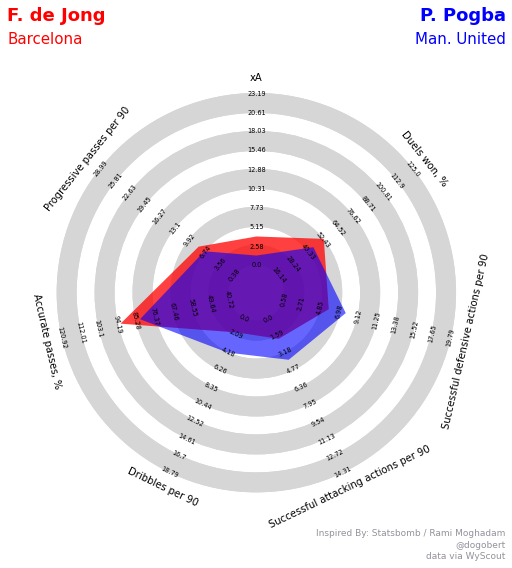

In [17]:
radar = Radar()
fig,ax=radar.plot_radar(ranges=ranges,params=params,values=values,
                        radar_color=['red','blue'],alphas=[.75,.6],title=title,endnote=endnote,compare=True)

In [20]:
Y = np.array(dfmf[['xG', 'xA', 'Duels per 90', 'Duels won, %',
       'Successful defensive actions per 90', 'Defensive duels per 90',
       'Defensive duels won, %', 'Aerial duels per 90', 'Aerial duels won, %',
       'PAdj Sliding tackles', 'Shots blocked per 90', 'PAdj Interceptions',
       'Fouls per 90',
       'Successful attacking actions per 90', 'Shots per 90',
       'Shots on target, %', 'Crosses per 90', 'Accurate crosses, %',
       'Dribbles per 90', 'Successful dribbles, %', 'Offensive duels per 90',
       'Touches in box per 90', 'Progressive runs per 90',
       'Received passes per 90', 'Passes per 90', 'Accurate passes, %',
       'Forward passes per 90', 'Back passes per 90', 'Lateral passes per 90',
       'Long passes per 90', 'Average pass length, m', 'Smart passes per 90',
       'Key passes per 90', 'Passes to final third per 90',
       'Passes to penalty area per 90', 'Through passes per 90',
       'Deep completions per 90', 'Deep completed crosses per 90',
       'Progressive passes per 90',]])
kmeans = KMeans(n_clusters=4,random_state=100)
kmeans.fit(Y)
dfmf['cluster']=kmeans.predict(Y)
cluster=kmeans.fit_predict(Y)

/var/folders/x0/t0nrv2l177g5vngp2fy7vkvm0000gn/T/ipykernel_1928/2262368284.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmf['cluster']=kmeans.predict(Y)


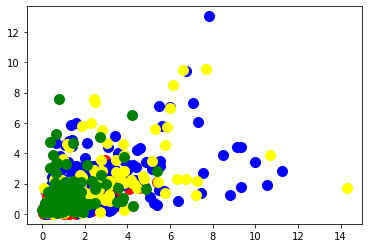

In [21]:
plt.scatter(Y[cluster==0,0],Y[cluster==0,1],s=100,c='red')
plt.scatter(Y[cluster==1,0],Y[cluster==1,1],s=100,c='blue')
plt.scatter(Y[cluster==2,0],Y[cluster==2,1],s=100,c='yellow')
plt.scatter(Y[cluster==3,0],Y[cluster==3,1],s=100,c='green')

In [22]:
distortions = []
K=range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

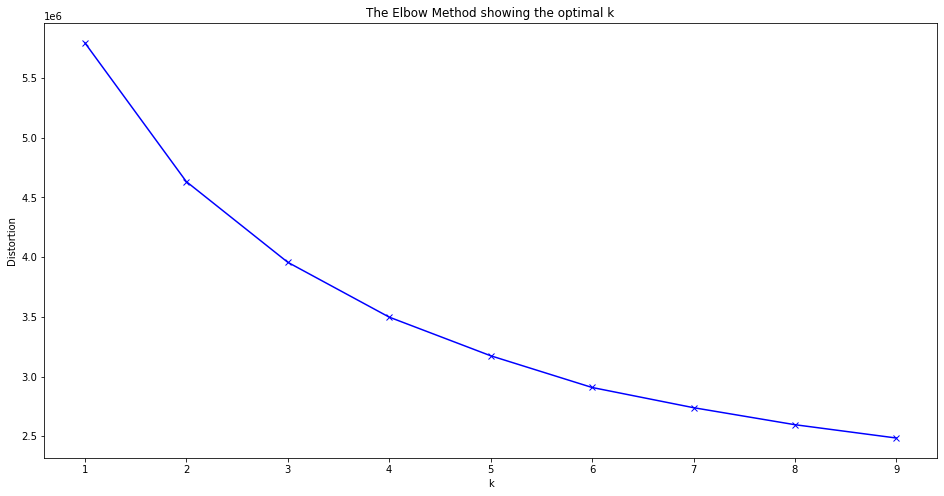

In [23]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [24]:
dfmf.loc[dfmf['Player'] == 'F. de Jong']

,Player,Team,Position,Age,Market value,Minutes played,xG,xA,Duels per 90,"Duels won, %",...,Through passes per 90,Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90,Midfield,Attacking,Forward,Centerback,Fullback,cluster
18,F. de Jong,Barcelona,CM,25,60000000,3353,3.86,3.88,15.27,53.25,...,1.42,1.37,0.21,8.08,1,0,0,0,0,2


In [30]:
dfdj = dfmf.loc[dfmf['cluster'] == 2]

In [31]:
dfdj.reset_index(drop=True)

,Player,Team,Position,Age,Market value,Minutes played,xG,xA,Duels per 90,"Duels won, %",...,Through passes per 90,Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90,Midfield,Attacking,Forward,Centerback,Fullback,cluster
0,J. Kimmich,Bayern München,DMF,27,80000000,2316,2.42,7.56,16.55,53.76,...,2.53,1.90,0.58,11.62,1,0,0,0,0,2
1,Bernardo Silva,Manchester City,CM,27,80000000,2201,4.71,2.51,16.77,43.41,...,0.41,1.27,0.37,4.42,1,0,0,0,0,2
2,J. Bellingham,Borussia Dortmund,CM,19,80000000,1772,3.67,2.36,24.58,48.35,...,1.47,1.52,0.36,6.25,1,0,0,0,0,2
3,Rodri,Manchester City,DMF,26,80000000,2930,3.20,0.83,18.71,55.99,...,0.92,0.61,0.09,9.34,1,0,0,0,0,2
4,Pedri,Barcelona,CM,19,80000000,2534,3.86,2.85,16.23,48.58,...,1.78,2.02,0.18,5.36,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,N. De La Cruz,River Plate,CM,25,13000000,1442,1.54,1.02,21.47,46.22,...,1.19,1.25,0.31,8.36,1,0,0,0,0,2
123,A. Palavecino,River Plate,CM,25,6000000,1371,1.82,2.22,23.63,44.72,...,1.31,1.12,0.66,8.27,1,0,0,0,0,2
124,L. Miranda,Racing Club,CM,28,2400000,2265,4.19,2.22,19.11,49.69,...,1.15,1.35,0.40,7.95,1,0,0,0,0,2
125,G. Florentín,Argentinos Juniors,CM,23,2000000,1255,0.92,2.24,18.22,49.21,...,0.72,0.79,0.65,9.32,1,0,0,0,0,2


<AxesSubplot:>

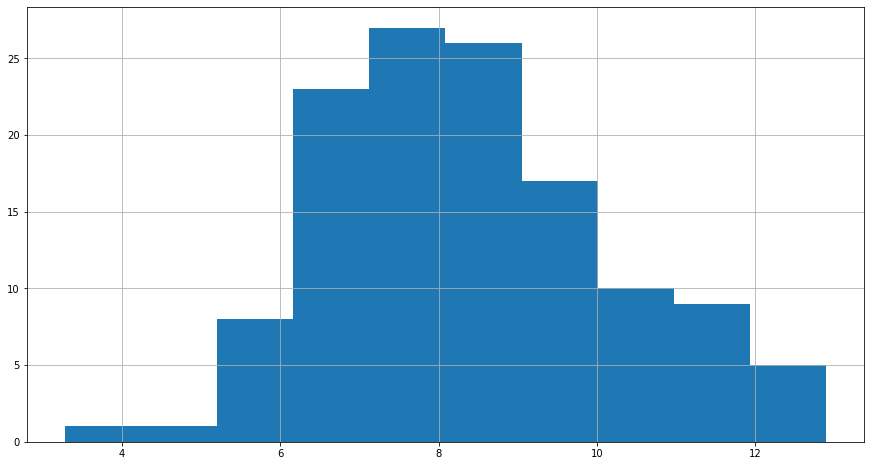

In [32]:
rcParams['figure.figsize'] = 15,8
dfdj['Progressive passes per 90'].hist()

In [34]:
from sklearn.preprocessing import MinMaxScaler
X = dfdj.select_dtypes(np.number)
dfdj[X.columns] = MinMaxScaler().fit_transform(X)

/Users/arshdeepsingh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [36]:
# progressive passes, duels/90, succ def actions, succ att actions, dribbles/90, 
col_sum = dfdj[['Player','Age','Duels per 90','Successful defensive actions per 90','Successful attacking actions per 90','Dribbles per 90','Progressive passes per 90','Accurate passes, %']]

In [37]:
col_sum['Age'] = col_sum['Age'].astype(str)

/var/folders/x0/t0nrv2l177g5vngp2fy7vkvm0000gn/T/ipykernel_1928/425515017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_sum['Age'] = col_sum['Age'].astype(str)


In [38]:
col_sum['Sum']=col_sum.iloc[:].sum(axis=1)

/var/folders/x0/t0nrv2l177g5vngp2fy7vkvm0000gn/T/ipykernel_1928/2568710480.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  col_sum['Sum']=col_sum.iloc[:].sum(axis=1)
/var/folders/x0/t0nrv2l177g5vngp2fy7vkvm0000gn/T/ipykernel_1928/2568710480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_sum['Sum']=col_sum.iloc[:].sum(axis=1)


In [39]:
col_sum['Age'] = col_sum['Age'].astype(float)

/var/folders/x0/t0nrv2l177g5vngp2fy7vkvm0000gn/T/ipykernel_1928/2139000041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_sum['Age'] = col_sum['Age'].astype(float)


In [40]:
col_sum.sort_values(by=['Sum'],ascending=False)

,Player,Age,Duels per 90,Successful defensive actions per 90,Successful attacking actions per 90,Dribbles per 90,Progressive passes per 90,"Accurate passes, %",Sum
22,M. Verratti,0.555556,0.923116,0.775435,0.424893,0.500000,0.885536,0.830996,4.339976
1560,R. Gravenberch,0.055556,0.815479,0.476627,0.939914,0.927046,0.387097,0.462132,4.008295
62,Renato Sanches,0.277778,0.873398,0.310724,0.819742,1.000000,0.496358,0.423562,3.923785
167,I. Gueye,0.722222,0.706817,0.669111,0.420601,0.386121,0.774194,0.897616,3.854459
59,Luis Alberto,0.555556,0.544336,0.266728,1.000000,0.775801,0.957336,0.187237,3.731438
...,...,...,...,...,...,...,...,...,...
416,A. Guardado,0.888889,0.343926,0.406049,0.257511,0.202847,0.262227,0.359748,1.832308
93,C. Eriksen,0.611111,0.073808,0.246563,0.375536,0.225979,0.377732,0.511921,1.811539
271,S. Nzonzi,0.777778,0.123526,0.174152,0.000000,0.051601,0.522373,0.938990,1.810643
476,P. Schiattarella,0.888889,0.192209,0.445463,0.225322,0.160142,0.656608,0.128331,1.808075


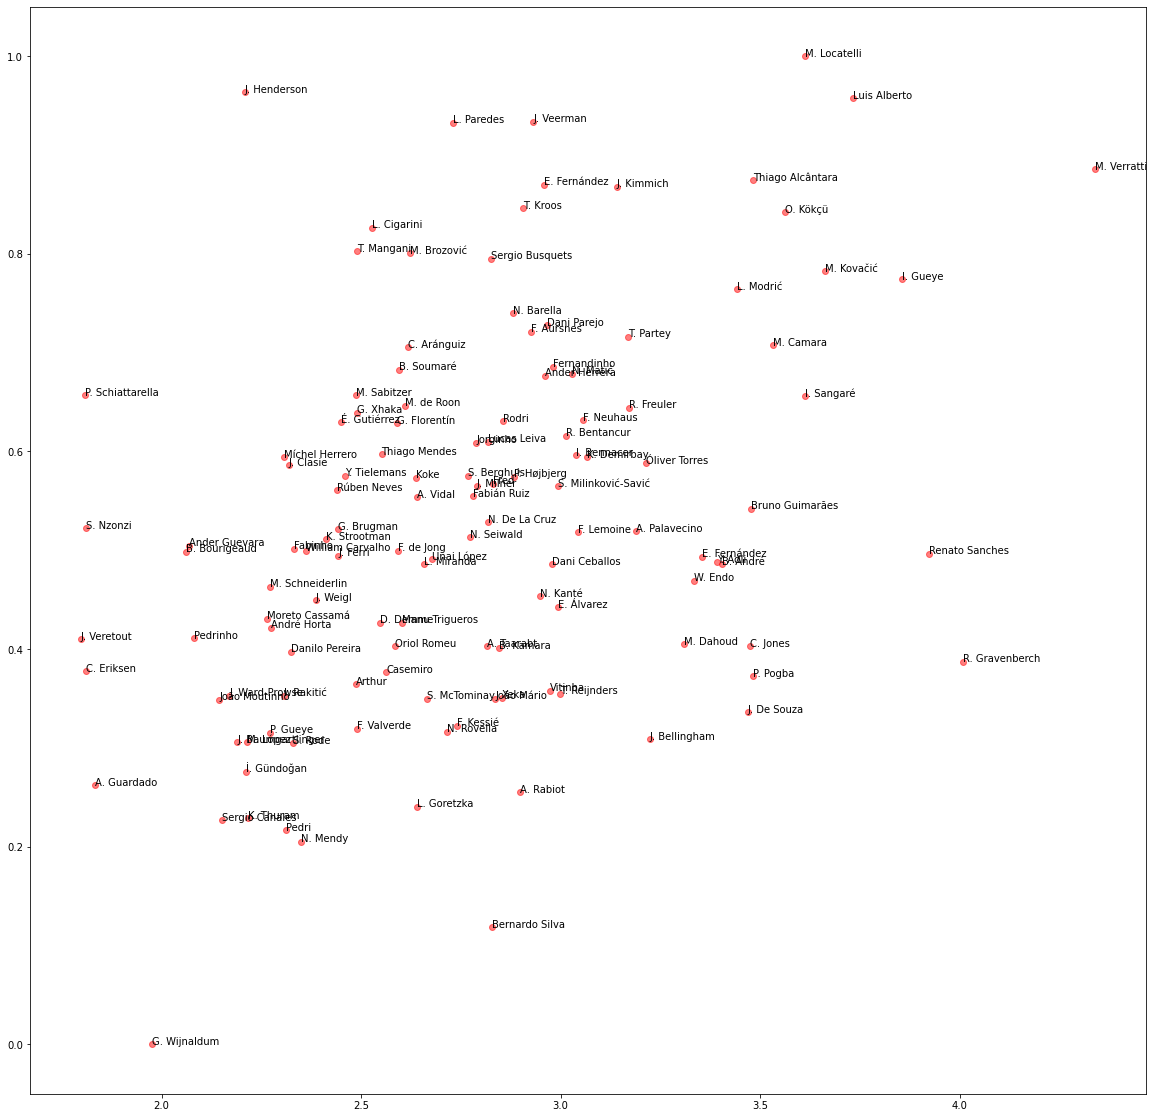

In [41]:
x = col_sum['Sum']
y = col_sum['Progressive passes per 90']
colors = 'red'

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

plt.scatter(x, y, c=colors, alpha=0.5)

[plt.text(x=row['Sum'], y=row['Progressive passes per 90'], s=row['Player']) for k,row in col_sum.iterrows()]

plt.show()

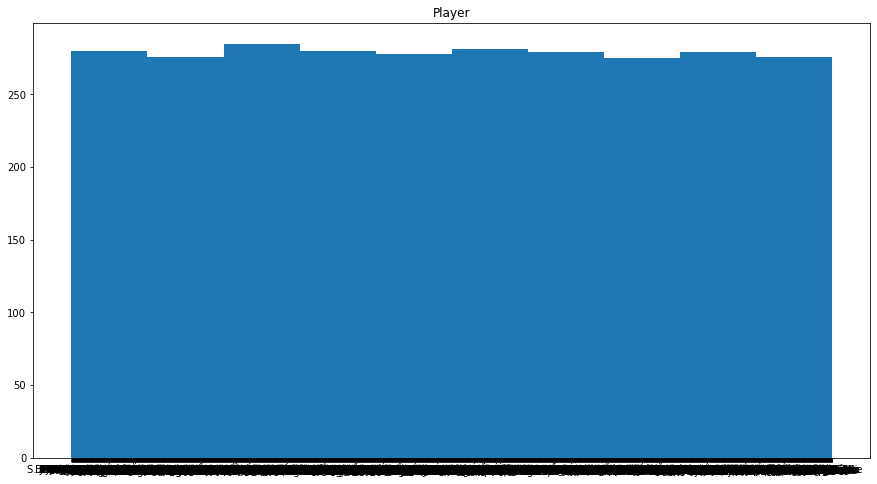

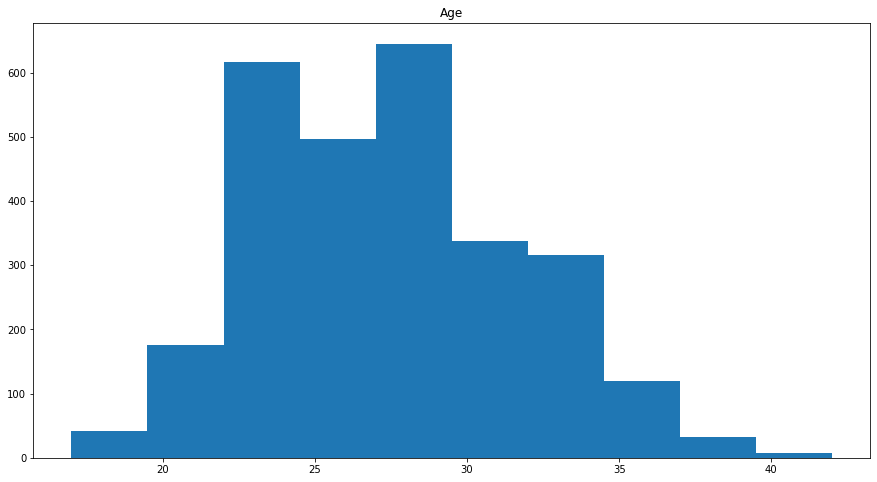

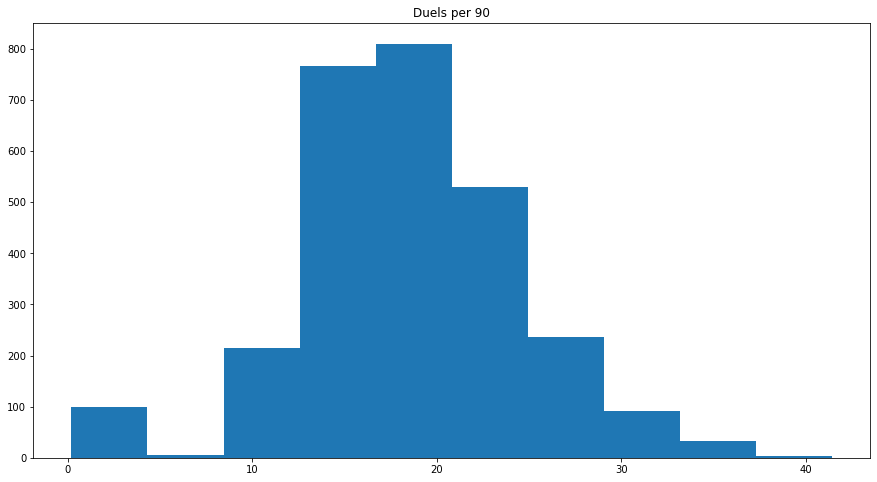

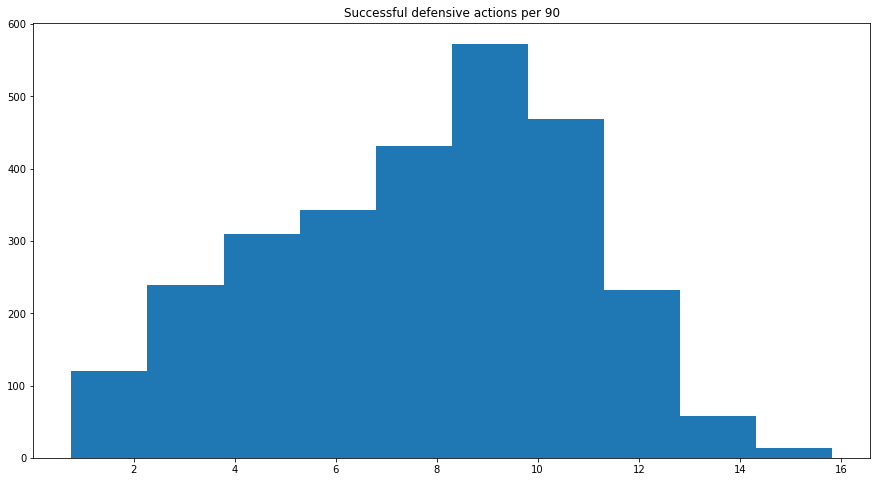

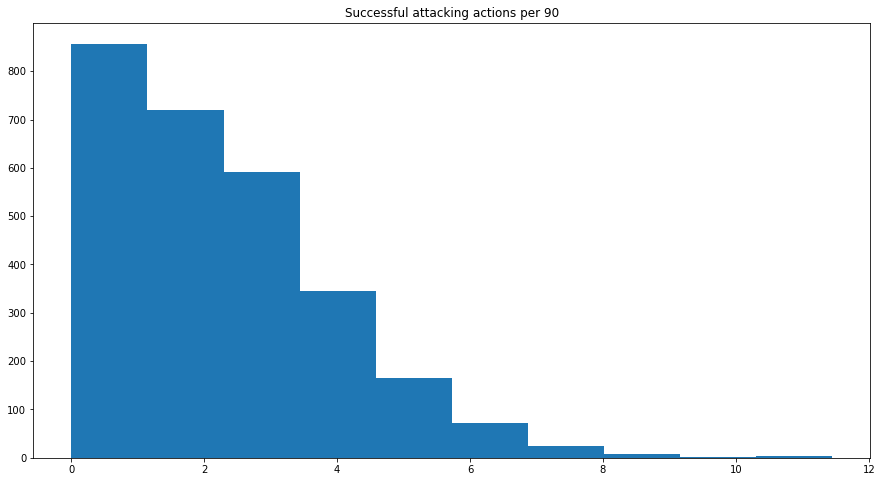

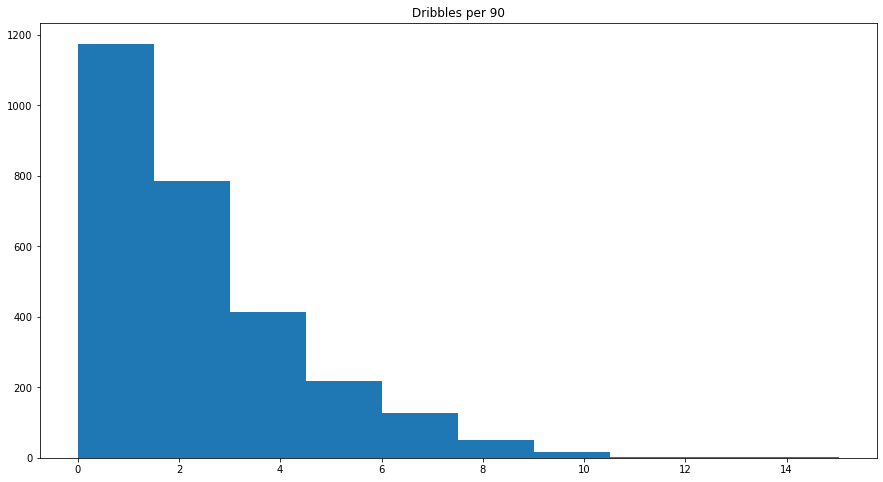

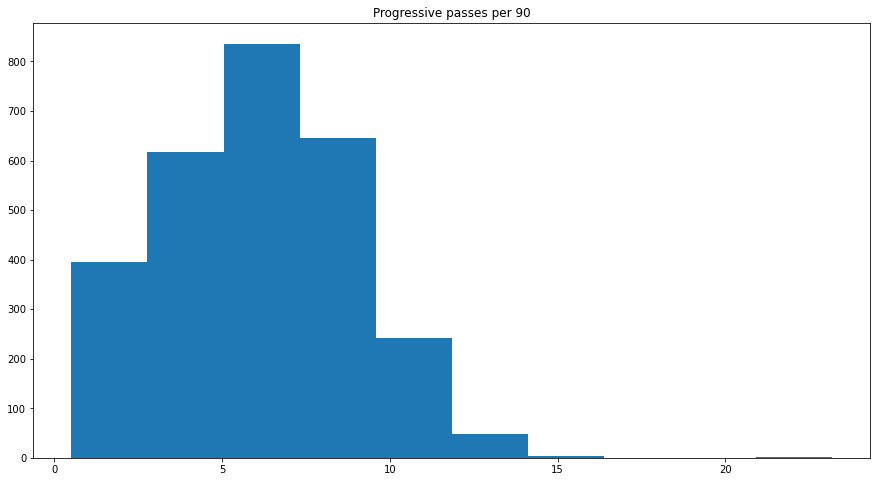

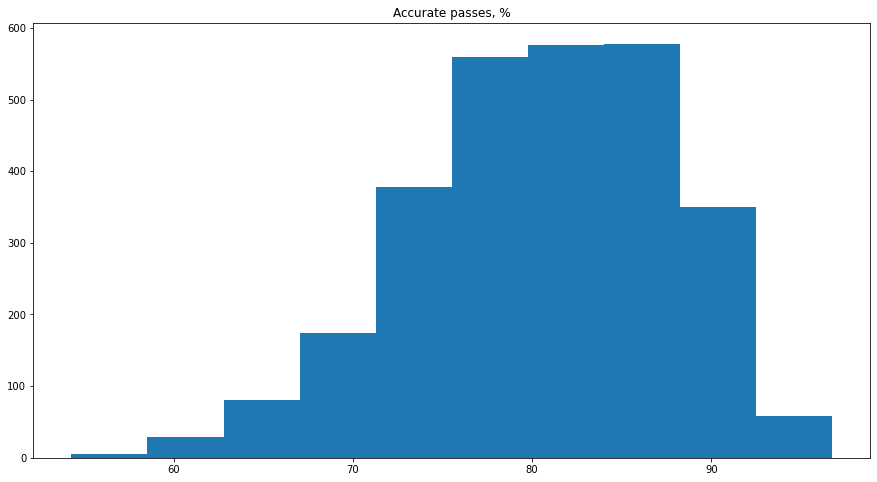

KeyError: 'Sum'

In [42]:
for i in col_sum.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

In [43]:
col_sum.sort_values(by=['Accurate passes, %'],ascending=False)

,Player,Age,Duels per 90,Successful defensive actions per 90,Successful attacking actions per 90,Dribbles per 90,Progressive passes per 90,"Accurate passes, %",Sum
107,Arthur,0.333333,0.377755,0.382218,0.130901,0.233096,0.364204,1.000000,2.488174
111,G. Wijnaldum,0.666667,0.312148,0.212649,0.231760,0.258007,0.000000,0.960729,1.975293
140,M. López,0.277778,0.243977,0.267644,0.248927,0.199288,0.305931,0.948808,2.214576
271,S. Nzonzi,0.777778,0.123526,0.174152,0.000000,0.051601,0.522373,0.938990,1.810643
151,Danilo Pereira,0.611111,0.235264,0.479377,0.152361,0.142349,0.397503,0.916550,2.323402
...,...,...,...,...,...,...,...,...,...
7,S. Milinković-Savić,0.388889,0.906202,0.521540,0.590129,0.343416,0.565036,0.065919,2.992242
138,M. Sabitzer,0.500000,0.432086,0.452796,0.624464,0.295374,0.656608,0.025947,2.487273
2378,A. Palavecino,0.333333,0.785238,0.725023,0.504292,0.638790,0.519251,0.015428,3.188022
2445,G. Florentín,0.222222,0.507945,0.410632,0.605150,0.432384,0.628512,0.004909,2.589532


In [44]:
df.loc[df['Player'] == 'M. López']

,Player,Team,Position,Age,Market value,Minutes played,xG,xA,Duels per 90,"Duels won, %",...,Through passes per 90,Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90,Midfield,Attacking,Forward,Centerback,Fullback,cluster
140,M. López,Sassuolo,DMF,24,15000000,2127,1.52,1.36,13.07,49.19,...,0.80,1.18,0.13,6.22,1,0,0,0,0,0
1498,M. López,Juárez,CB,31,1200000,1969,1.27,0.03,10.15,62.16,...,0.05,0.00,0.00,3.38,0,0,0,1,0,3


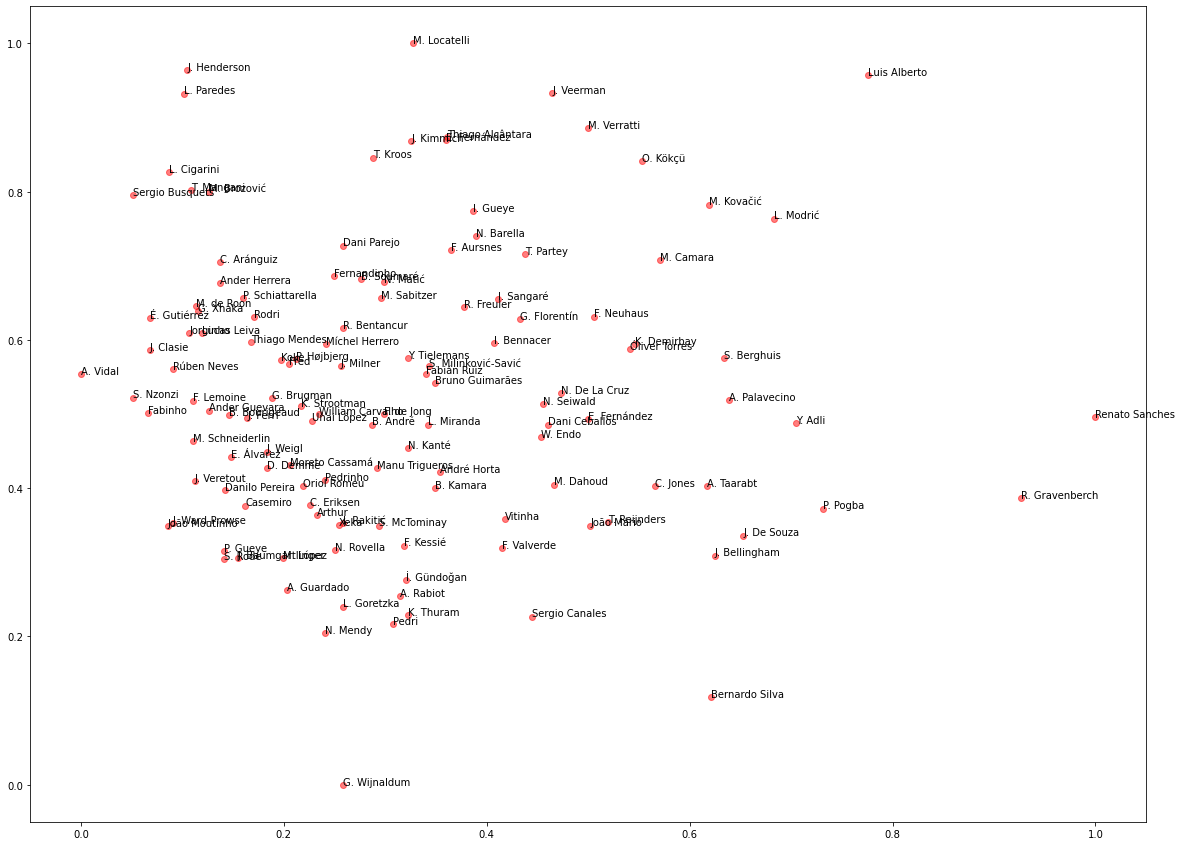

In [45]:
x = col_sum['Dribbles per 90']
y = col_sum['Progressive passes per 90']
colors = 'red'

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)

plt.scatter(x, y, c=colors, alpha=0.5)

[plt.text(x=row['Dribbles per 90'], y=row['Progressive passes per 90'], s=row['Player']) for k,row in col_sum.iterrows()]

plt.show()

In [47]:
col_sum.loc[col_sum['Player'] == 'F. de Jong']

,Player,Age,Duels per 90,Successful defensive actions per 90,Successful attacking actions per 90,Dribbles per 90,Progressive passes per 90,"Accurate passes, %",Sum
18,F. de Jong,0.333333,0.35674,0.252062,0.339056,0.298932,0.49948,0.847125,2.593395


In [46]:
attributes = ["Duels per 90", "Successful defensive actions per 90", "Successful attacking actions per 90",'Dribbles per 90','Progressive passes per 90','Accurate passes, %']
weights = [.13755,.09719,.13073,.11526,.19259,.32668]

In [48]:
Score = col_sum[attributes].mul(weights).sum(1)
wait2 = col_sum.assign(Score=Score)
wait2

,Player,Age,Duels per 90,Successful defensive actions per 90,Successful attacking actions per 90,Dribbles per 90,Progressive passes per 90,"Accurate passes, %",Sum,Score
0,J. Kimmich,0.444444,0.422348,0.549954,0.478541,0.325623,0.867846,0.496494,3.140805,0.540968
1,Bernardo Silva,0.444444,0.433624,0.312557,0.579399,0.620996,0.118626,0.761571,2.826774,0.508980
2,J. Bellingham,0.000000,0.833931,0.535289,0.577253,0.624555,0.309053,0.342917,3.222999,0.485727
3,Rodri,0.388889,0.533060,0.542621,0.128755,0.170819,0.630593,0.848527,2.854376,0.561223
5,Pedri,0.000000,0.405946,0.450046,0.437768,0.307829,0.216441,0.494390,2.312420,0.395479
...,...,...,...,...,...,...,...,...,...,...
2362,N. De La Cruz,0.333333,0.674526,0.424381,0.420601,0.473310,0.528616,0.295933,2.817366,0.442047
2378,A. Palavecino,0.333333,0.785238,0.725023,0.504292,0.638790,0.519251,0.015428,3.188022,0.423070
2437,L. Miranda,0.500000,0.553562,0.598533,0.431330,0.341637,0.485952,0.246143,2.657158,0.404078
2445,G. Florentín,0.222222,0.507945,0.410632,0.605150,0.432384,0.628512,0.004909,2.589532,0.361374


In [51]:
wait2.sort_values(by=['Score'],ascending=False)

,Player,Age,Duels per 90,Successful defensive actions per 90,Successful attacking actions per 90,Dribbles per 90,Progressive passes per 90,"Accurate passes, %",Sum,Score
22,M. Verratti,0.555556,0.923116,0.775435,0.424893,0.500000,0.885536,0.830996,4.339976,0.757531
167,I. Gueye,0.722222,0.706817,0.669111,0.420601,0.386121,0.774194,0.897616,3.854459,0.704078
34,M. Kovačić,0.500000,0.461814,0.326306,0.690987,0.619217,0.782518,0.781907,3.662750,0.663079
47,M. Locatelli,0.277778,0.598667,0.684693,0.351931,0.327402,1.000000,0.648668,3.611361,0.637133
63,C. Jones,0.111111,0.748847,0.414299,0.459227,0.565836,0.402706,0.882889,3.473804,0.634502
...,...,...,...,...,...,...,...,...,...,...
289,Ander Guevara,0.333333,0.390569,0.611366,0.148069,0.126335,0.504683,0.288219,2.069239,0.338412
106,B. Bourigeaud,0.500000,0.277806,0.414299,0.497854,0.145907,0.498439,0.227209,2.061515,0.330599
1964,Pedrinho,0.555556,0.429523,0.378552,0.394850,0.240214,0.411030,0.227209,2.081378,0.328563
416,A. Guardado,0.888889,0.343926,0.406049,0.257511,0.202847,0.262227,0.359748,1.832308,0.311840


In [52]:
col_sumAge = col_sum[col_sum['Age']<.5]
col_sumAge

,Player,Age,Duels per 90,Successful defensive actions per 90,Successful attacking actions per 90,Dribbles per 90,Progressive passes per 90,"Accurate passes, %",Sum
0,J. Kimmich,0.444444,0.422348,0.549954,0.478541,0.325623,0.867846,0.496494,3.140805
1,Bernardo Silva,0.444444,0.433624,0.312557,0.579399,0.620996,0.118626,0.761571,2.826774
2,J. Bellingham,0.000000,0.833931,0.535289,0.577253,0.624555,0.309053,0.342917,3.222999
3,Rodri,0.388889,0.533060,0.542621,0.128755,0.170819,0.630593,0.848527,2.854376
5,Pedri,0.000000,0.405946,0.450046,0.437768,0.307829,0.216441,0.494390,2.312420
...,...,...,...,...,...,...,...,...,...
2362,N. De La Cruz,0.333333,0.674526,0.424381,0.420601,0.473310,0.528616,0.295933,2.817366
2378,A. Palavecino,0.333333,0.785238,0.725023,0.504292,0.638790,0.519251,0.015428,3.188022
2437,L. Miranda,0.500000,0.553562,0.598533,0.431330,0.341637,0.485952,0.246143,2.657158
2445,G. Florentín,0.222222,0.507945,0.410632,0.605150,0.432384,0.628512,0.004909,2.589532


In [57]:
ScoreAll = col_sumAge[attributes].mul(weights).sum(1)


In [58]:
waitAll = col_sumAge.assign(ScoreAll=ScoreAll)
waitAll

,Player,Age,Duels per 90,Successful defensive actions per 90,Successful attacking actions per 90,Dribbles per 90,Progressive passes per 90,"Accurate passes, %",Sum,ScoreAll
0,J. Kimmich,0.444444,0.422348,0.549954,0.478541,0.325623,0.867846,0.496494,3.140805,0.540968
1,Bernardo Silva,0.444444,0.433624,0.312557,0.579399,0.620996,0.118626,0.761571,2.826774,0.508980
2,J. Bellingham,0.000000,0.833931,0.535289,0.577253,0.624555,0.309053,0.342917,3.222999,0.485727
3,Rodri,0.388889,0.533060,0.542621,0.128755,0.170819,0.630593,0.848527,2.854376,0.561223
5,Pedri,0.000000,0.405946,0.450046,0.437768,0.307829,0.216441,0.494390,2.312420,0.395479
...,...,...,...,...,...,...,...,...,...,...
2362,N. De La Cruz,0.333333,0.674526,0.424381,0.420601,0.473310,0.528616,0.295933,2.817366,0.442047
2378,A. Palavecino,0.333333,0.785238,0.725023,0.504292,0.638790,0.519251,0.015428,3.188022,0.423070
2437,L. Miranda,0.500000,0.553562,0.598533,0.431330,0.341637,0.485952,0.246143,2.657158,0.404078
2445,G. Florentín,0.222222,0.507945,0.410632,0.605150,0.432384,0.628512,0.004909,2.589532,0.361374


In [60]:
waitAll.sort_values(by=['ScoreAll'],ascending=False)

,Player,Age,Duels per 90,Successful defensive actions per 90,Successful attacking actions per 90,Dribbles per 90,Progressive passes per 90,"Accurate passes, %",Sum,ScoreAll
34,M. Kovačić,0.500000,0.461814,0.326306,0.690987,0.619217,0.782518,0.781907,3.662750,0.663079
47,M. Locatelli,0.277778,0.598667,0.684693,0.351931,0.327402,1.000000,0.648668,3.611361,0.637133
63,C. Jones,0.111111,0.748847,0.414299,0.459227,0.565836,0.402706,0.882889,3.473804,0.634502
1560,R. Gravenberch,0.055556,0.815479,0.476627,0.939914,0.927046,0.387097,0.462132,4.008295,0.613739
62,Renato Sanches,0.277778,0.873398,0.310724,0.819742,1.000000,0.496358,0.423562,3.923785,0.606723
...,...,...,...,...,...,...,...,...,...,...
20,Y. Tielemans,0.333333,0.454126,0.424381,0.500000,0.322064,0.575442,0.183731,2.459744,0.377042
2445,G. Florentín,0.222222,0.507945,0.410632,0.605150,0.432384,0.628512,0.004909,2.589532,0.361374
138,M. Sabitzer,0.500000,0.432086,0.452796,0.624464,0.295374,0.656608,0.025947,2.487273,0.354054
289,Ander Guevara,0.333333,0.390569,0.611366,0.148069,0.126335,0.504683,0.288219,2.069239,0.338412
